In [39]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [40]:
# Import the requests library.
import requests

# Import the API key. Note that you saved this as a text file in this folder and it is referencing that api key
from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff5cdb64b943b70f68c31e2c3da5caa3


In [42]:
# Import the time library and the datetime module from the datetime library 
from datetime import datetime

In [43]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [44]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [46]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# NOTE: removed "        time.sleep(60)" from below record_count = 1 in code below

In [48]:
# Using the enumerate() method
# Loop through all the cities in the list by creating a for loop with the enumerate() method and reference the index 
# and the city in the list..
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1


    # Create endpoint URL with each city. The city.replace piece is to remove spaces in city names.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 2 | ponta do sol
Processing Record 2 of Set 2 | vaini
Processing Record 3 of Set 2 | powell river
Processing Record 4 of Set 2 | busselton
Processing Record 5 of Set 2 | kapaa
Processing Record 6 of Set 2 | ligayan
Processing Record 7 of Set 2 | makubetsu
Processing Record 8 of Set 2 | marabba
Processing Record 9 of Set 2 | monroe
Processing Record 10 of Set 2 | san borja
Processing Record 11 of Set 2 | cape town
Processing Record 12 of Set 2 | hithadhoo
Processing Record 13 of Set 2 | puerto ayora
Processing Record 14 of Set 2 | hofn
Processing Record 15 of Set 2 | byron bay
Processing Record 16 of Set 2 | bredasdorp
Processing Record 17 of Set 2 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 2 | serro
Processing Record 19 of Set 2 | huarmey
Processing Record 20 of Set 2 | ushuaia
Processing Record 21 of Set 2 | upernavik
Processing Record 22 of Set 2 | katsuura
Processing Record 23 of Set 2 | new norfolk
Processing Record 24 of S

Processing Record 41 of Set 5 | pangnirtung
Processing Record 42 of Set 5 | sitka
Processing Record 43 of Set 5 | meulaboh
Processing Record 44 of Set 5 | porbandar
Processing Record 45 of Set 5 | saint george
Processing Record 46 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 5 | uvarovka
Processing Record 48 of Set 5 | aklavik
Processing Record 49 of Set 5 | praia
Processing Record 50 of Set 5 | tateyama
Processing Record 1 of Set 6 | petrovskoye
Processing Record 2 of Set 6 | moindou
Processing Record 3 of Set 6 | bud
Processing Record 4 of Set 6 | ribeira grande
Processing Record 5 of Set 6 | charters towers
Processing Record 6 of Set 6 | hit
Processing Record 7 of Set 6 | dongsheng
Processing Record 8 of Set 6 | aquiraz
Processing Record 9 of Set 6 | bulawayo
Processing Record 10 of Set 6 | trincomalee
Processing Record 11 of Set 6 | festus
Processing Record 12 of Set 6 | vytegra
Processing Record 13 of Set 6 | buraydah
Processing Record 14 of Set 

Processing Record 30 of Set 9 | wembley
Processing Record 31 of Set 9 | antofagasta
Processing Record 32 of Set 9 | longyearbyen
Processing Record 33 of Set 9 | sembe
Processing Record 34 of Set 9 | saleaula
City not found. Skipping...
Processing Record 35 of Set 9 | saint-augustin
Processing Record 36 of Set 9 | lyubech
Processing Record 37 of Set 9 | marsaxlokk
Processing Record 38 of Set 9 | amazar
Processing Record 39 of Set 9 | beringovskiy
Processing Record 40 of Set 9 | griffith
Processing Record 41 of Set 9 | usakos
Processing Record 42 of Set 9 | kenai
Processing Record 43 of Set 9 | ust-kuyga
Processing Record 44 of Set 9 | decatur
Processing Record 45 of Set 9 | kashi
Processing Record 46 of Set 9 | pemberton
Processing Record 47 of Set 9 | mwinilunga
Processing Record 48 of Set 9 | mbini
Processing Record 49 of Set 9 | jining
Processing Record 50 of Set 9 | cockburn harbour
City not found. Skipping...
Processing Record 1 of Set 10 | pemangkat
Processing Record 2 of Set 10 |

Processing Record 17 of Set 13 | dukat
Processing Record 18 of Set 13 | campo gobierno
Processing Record 19 of Set 13 | guider
Processing Record 20 of Set 13 | gladstone
Processing Record 21 of Set 13 | cherskiy
Processing Record 22 of Set 13 | kaspiyskiy
Processing Record 23 of Set 13 | balabac
Processing Record 24 of Set 13 | tuggurt
City not found. Skipping...
Processing Record 25 of Set 13 | altea
Processing Record 26 of Set 13 | jian
Processing Record 27 of Set 13 | yizheng
Processing Record 28 of Set 13 | lanxi
Processing Record 29 of Set 13 | korla
Processing Record 30 of Set 13 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 13 | rachitoasa
Processing Record 32 of Set 13 | axim
Processing Record 33 of Set 13 | olafsvik
Processing Record 34 of Set 13 | makinsk
Processing Record 35 of Set 13 | krasnoshchekovo
Processing Record 36 of Set 13 | fort-shevchenko
Processing Record 37 of Set 13 | denpasar
Processing Record 38 of Set 13 | birin
Processing Record 39 o

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,70.43,55,69,4.63,PT,2022-10-09 19:42:14
1,Vaini,-21.2000,-175.2000,73.56,94,100,11.50,TO,2022-10-09 19:39:24
2,Powell River,49.8496,-124.5361,66.07,82,20,8.05,CA,2022-10-09 19:45:34
3,Busselton,-33.6500,115.3333,55.06,79,100,11.77,AU,2022-10-09 19:42:09
4,Kapaa,22.0752,-159.3190,83.10,66,0,1.01,US,2022-10-09 19:47:12
5,Ligayan,4.6533,119.4706,82.85,73,100,5.55,PH,2022-10-09 19:47:12
6,Makubetsu,45.3714,141.8211,51.49,78,100,10.31,JP,2022-10-09 19:47:12
7,Marabba,12.3500,32.1833,78.12,69,2,7.92,SD,2022-10-09 19:47:13
8,Monroe,43.1501,-77.6831,61.47,54,75,11.50,US,2022-10-09 19:44:39
9,San Borja,-14.8167,-66.8500,81.90,69,98,3.67,BO,2022-10-09 19:47:13


In [50]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-10-09 19:42:14,32.6667,-17.1000,70.43,55,69,4.63
1,Vaini,TO,2022-10-09 19:39:24,-21.2000,-175.2000,73.56,94,100,11.50
2,Powell River,CA,2022-10-09 19:45:34,49.8496,-124.5361,66.07,82,20,8.05
3,Busselton,AU,2022-10-09 19:42:09,-33.6500,115.3333,55.06,79,100,11.77
4,Kapaa,US,2022-10-09 19:47:12,22.0752,-159.3190,83.10,66,0,1.01
5,Ligayan,PH,2022-10-09 19:47:12,4.6533,119.4706,82.85,73,100,5.55
6,Makubetsu,JP,2022-10-09 19:47:12,45.3714,141.8211,51.49,78,100,10.31
7,Marabba,SD,2022-10-09 19:47:13,12.3500,32.1833,78.12,69,2,7.92
8,Monroe,US,2022-10-09 19:44:39,43.1501,-77.6831,61.47,54,75,11.50
9,San Borja,BO,2022-10-09 19:47:13,-14.8167,-66.8500,81.90,69,98,3.67


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [54]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/09/22'

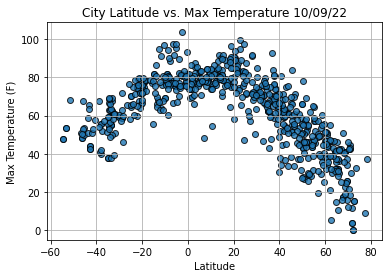

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

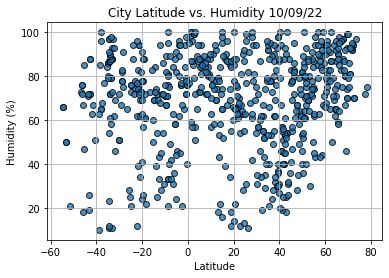

In [57]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

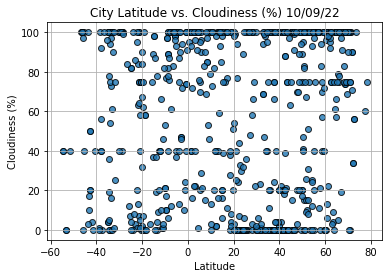

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

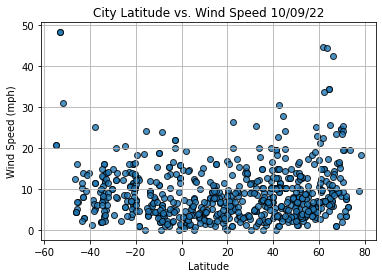

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# example working with slope

In [ ]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [61]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [62]:
# Perform linear regression.
# slope = slope of the regression line
# intercept = y-intercept
# r_value = correlation coefficient (fit of the line)
# p-value = significance of the results
    # A linear regression with a p-value > 0.05 is not statistically significant.
    # A linear regression with a p-value < 0.05 is statistically significant.
# std_err = how well the line fits our data
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [63]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

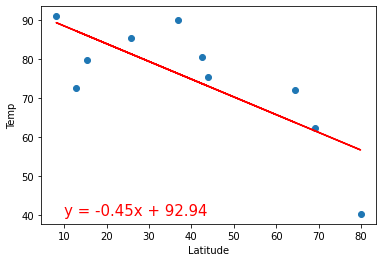

In [64]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# back to the weather data - Linear Regressions

In [69]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
index13 = city_data_df.loc[13]
index13

City                         Hofn
Country                        IS
Date          2022-10-09 19:47:14
Lat                       64.2539
Lng                      -15.2082
Max Temp                    41.54
Humidity                       65
Cloudiness                    100
Wind Speed                   34.4
Name: 13, dtype: object

In [72]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
647     True
648     True
649    False
650     True
651     True
Name: Lat, Length: 652, dtype: bool

In [73]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-10-09 19:42:14,32.6667,-17.1000,70.43,55,69,4.63
2,Powell River,CA,2022-10-09 19:45:34,49.8496,-124.5361,66.07,82,20,8.05
4,Kapaa,US,2022-10-09 19:47:12,22.0752,-159.3190,83.10,66,0,1.01
5,Ligayan,PH,2022-10-09 19:47:12,4.6533,119.4706,82.85,73,100,5.55
6,Makubetsu,JP,2022-10-09 19:47:12,45.3714,141.8211,51.49,78,100,10.31
...,...,...,...,...,...,...,...,...,...
646,Osakarovka,KZ,2022-10-09 19:50:20,50.5650,72.5692,40.33,84,82,10.45
647,Mirnyy,RU,2022-10-09 19:50:20,62.5353,113.9611,32.23,100,100,7.00
648,Mao,ES,2022-10-09 19:50:20,39.8885,4.2658,66.76,88,20,8.05
650,Maarianhamina,AX,2022-10-09 19:50:21,60.0973,19.9348,51.66,66,0,6.91


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear Regression on Northern and Southern Hemispheres for Maximum Temperature

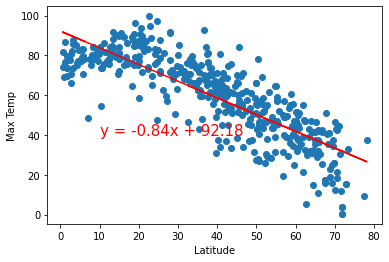

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

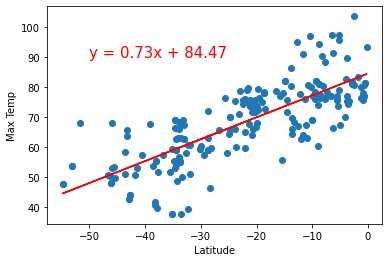

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Finding for above: The correlation between the latitude and the maximum temperature is strong to very strong because 
# the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown 
# by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
# And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

# Linear Regression on Northern and Southern Hemispheres for % Humidity

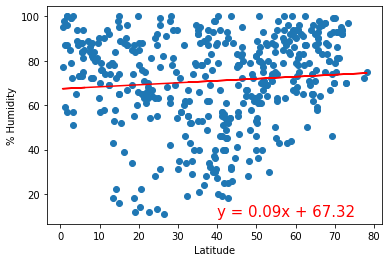

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'Wind',(40,10))

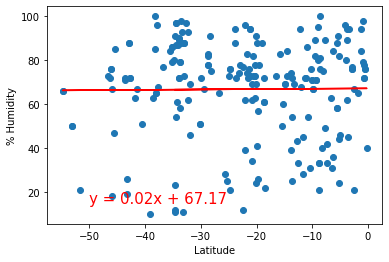

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# finding for the above: The correlation between the latitude and percent humidity is very low because the r-value is less 
# than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is 
# unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# Check the r-values for your plots. 

# Linear Regression on Northern and Southern Hemispheres for % Cloudiness

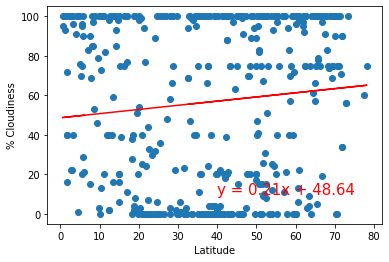

In [81]:
# Linear regression on the Northern Hemisphere on Latitude and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

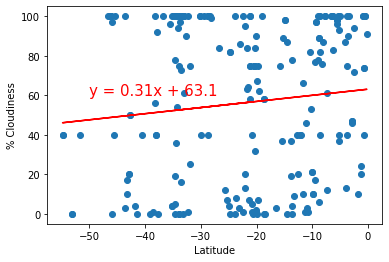

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# finding for above two: The correlation between the latitude and percent cloudiness is very low because the r-value 
# is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent 
# cloudiness. Check the r-values for your plots. 

# Linear Regression on Northern and Southern Hemispheres for Wind Speed

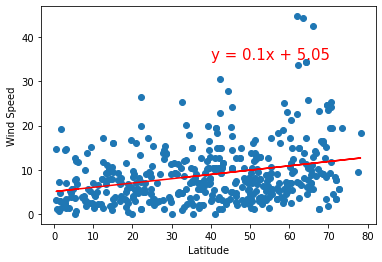

In [85]:
# Linear regression on the Northern Hemisphere on Latitude and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

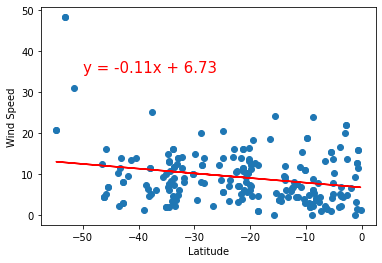

In [86]:
# Linear regression on the Northern Hemisphere on Latitude and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
# Finding The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 
# for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. 
# This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
# Check the r-values for your plots. 